# Расчёт полей тороидально намагниченного цилиндра в опыте Дейны         (опыт Николаева номер 31)

Вводим цилиндрическую систему координат, в которой (вслед за Таммом) индексом $j$ обозначаем координаты молекулярных токов намагниченного цилиндра, а индексом $a$ обозначаем координаты точек наблюдения

In [1]:
zj = var("zj")
za = var("za")
rj = var("rj")
ra = var("ra")
phi = var("phi")

assume(rj>0)
assume(ra>0)

Следуя Тамму, обозначаем вектор намагниченности цилиндра через $I$. 
В данном расчёте предположим, что цилиндр имеет только $\varphi$-тую компоненту намагниченности и величина этой намагниченности постоянна в объёме ($I_{\varphi} = const$).

Для поверхностного тока у Тамма можно почерпнуть формулу $js = c \cdot [I \times n]$ (параграф 61. Векторный потенциал магнитного поля при наличии магнентиков. Средняя плотность объёмных и поверхностных токов. Уравнение 61.10 - случай для вакуума)
Для объёмного тока - формулу $jv = c \cdot rot(I)$ (там же, уравнение 61.9)

В работе http://liquidcrystalosmos.narod.ru/deyna_cylinders_nikolaevs_experiment_31.htm было показано, что при равномерной тороидальной намагниченности цилиндра средняя плотность объёмных токов в данной конфигурации имеет только лишь $z$ компоненту, которая по модулю обратно пропорциональна радиус координате цилиндрической системы.

К этому же выводу можно прийти взяв ротор от $I$ при условии $I_{\varphi} = const$ в цилиндрических координатах

In [2]:
c = var("c")    # скорость света
I0 = var("I0")  # намагниченность
js = c * I0     # плотность поверхностного тока на внутренней и внешней цилиндрической поверхностях цилиндра
                # js(rj1) = - c * I0
                # js(rj2) = + c * I0
jt = c * I0     # плотность поверхностного тока на торцах цилиндра
                # jt(zj1) = + c * I0
                # jt(zj2) = - c * I0
jv = - c * I0 / rj # плотность объёмного тока

Зная среднюю плотность объёмных и поверхностных токов можно вычислить векторный потенциал магнитного поля тороидально намагниченного цилиндра. Следуя Тамму

$A=\frac{1}{c}\int{\frac{j_v}{R}}d{V}+\frac{1}{c}\int{\frac{j_s}{R}}d{S}$

Распишем в этом интеграле отдельно интегрирование по торцам и по цилиндрическим поверхностям

$A=\frac{1}{c}\int{\frac{j_v}{R}}d{V}+\frac{1}{c}\int{\frac{j_s}{R}}d{S_{s}}+\frac{1}{c}\int{\frac{j_t}{R}}d{S_{t}}$

В цилиндрической системе координат интегрирование по объёму цилиндра

$A_V=\frac{1}{c}\int{\frac{j_v}{R}}d{V}=\frac{1}{c}\int\limits_{{{r}_{j}}}\int\limits_{{{\varphi}_{j}}}\int\limits_{{{z}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{z}_{j}}d{{\varphi }_{j}}d{{r}_{j}}$

интегрирование по цилиндрическим поверхностям цилиндра

$A_S=\frac{1}{c}\int{\frac{j_s}{R}}d{S_{s}}=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}\int\limits_{{{z}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{z}_{j}}d{{\varphi }_{j}}$

интегрирование по торцевым поверхностям цилиндра

$A_T=\frac{1}{c}\int{\frac{j_t}{R}}d{S_{t}}=\frac{1}{c}\int\limits_{{{r}_{j}}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

Во всех этих трёх интегралах нам потребуется интеграл $\int\limits_{0}^{2\pi}{\frac{1}{R}}d{\varphi}$ - обратного расстояния между точкой истока и точкой наблюдения в цилиндрической системе координат, проинтегрированный по координатному углу phi точек истока от нуля до $2\pi$

$R=\sqrt{(r_j\,sin(\varphi_j)-r_a\,sin(\varphi_a))^2+(r_j\,cos(\varphi_j)-r_a\,cos(\varphi_a))^2+(z_j-z_a)^2}$

Ввиду цилиндрической симметрии и ввиду того что

$\frac{\partial A}{\partial \varphi_a} = 0$

нам не потребуется дифференцирование векторного потенциала по $\varphi_a$ координате точек наблюдения, можно упростить расчёт полагая, что $\varphi_a = 0$, тогда 

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

В таком случае интеграл 
$IRphi=\int\limits_{0}^{2\pi}{\frac{1}{R}}d{\varphi_j}$
выражается через полный эллиптический интеграл первого рода следующим образом:

In [3]:
rja2 = (rj-ra)^2+(zj-za)^2
module = - 4*rj*ra / rja2
IRphi=4*elliptic_kc(module) / sqrt(rja2)
# print ("$$IR_{\\varphi} =", latex(IRphi), "$$")

$$IR_{\varphi} = \frac{4 \, K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)}{\sqrt{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}} $$

Введём переменные - пределы интегрирования по координатам молекулярных токов

In [4]:
zj1 = var("zj1") # левый торец цилиндра
zj2 = var("zj2") # правый торец цилиндра

rj1 = var("rj1") # радиус внутренней поверхности (сверления) цилиндра
rj2 = var("rj2") # радиус внешней цилиндрической поверхности цилиндра

вспомогательные переменные для интегрирования источников векторного потенциала по поверхностным и объёмным токам

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементарным объёмом ${{r}_{j}}\,d{{\varphi}_{j}}d{r_j}d{z_j}$ цилиндра

$A_v=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi}_{j}}$

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементом площади ${{r}_{j}}\,d{{\varphi}_{j}}d{z_j}$ цилиндрической поверхности цилиндра

$A_s=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi}_{j}}$

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементом площади ${{r}_{j}}\,d{{\varphi}_{j}}d{r_j}$  торцевой поверхности цилиндра

$A_t=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [5]:
As=IRphi*js*rj/c
# print ("$$A_s =", latex(As), "$$")

At=IRphi*jt*rj/c
# print ("$$A_t =", latex(At), "$$")

Av=IRphi*jv*rj/c
# print ("$$A_v =", latex(Av), "$$")

$$A_s = \frac{4 \, I_{0} r_{j} K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)}{\sqrt{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}} $$
$$A_t = \frac{4 \, I_{0} r_{j} K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)}{\sqrt{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}} $$
$$A_v = -\frac{4 \, I_{0} K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)}{\sqrt{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}} $$


Рассчитаем производную векторного потенциала, создаваемого торцевым поверхностным током, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_t = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [6]:
At_diff_za_ = lambda I0, r_j, r_a, z_j, z_a : (At.diff(za)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j)
# print ("At_diff_za = lambda I0, rj, ra, zj, za : ", At_diff_za_(I0, rj, ra, zj, za))
# print ("")
# print ("$$\\frac{\\partial}{\\partial z_a} A_t(I_0, rj, ra, zj, za) = ", latex(At_diff_za_(I0, rj, ra, zj, za)), "$$")


Итак, производная векторного потенциала, создаваемого торцевым поверхностным током, заключённом в плоском кольце толщиной $dr_j$ с радиусом $r_j$, по $z_a$ координате точки наблюдения

$$\frac{\partial}{\partial z_a} A_t(I_0, rj, ra, zj, za) =  -\frac{4 \, I_{0} r_{j} {\left(z_{a} - z_{j}\right)} K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)}{{\left({\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}\right)}^{\frac{3}{2}}} + \frac{4 \, {\left({\left(\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}} + 1\right)} K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right) - E\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)\right)} I_{0} r_{j} {\left(z_{a} - z_{j}\right)}}{{\left({\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}\right)}^{\frac{3}{2}} {\left(\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}} + 1\right)}} $$


In [7]:
At_diff_za = lambda I0, rj, ra, zj, za :  -4*I0*rj*(za - zj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 4*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*I0*rj*(za - zj)/(((ra - rj)^2 + (za - zj)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))

Учитывая положительное направление поверхностного тока в левом торце и отрицательное направление поверхностного тока в правом торце составим сумму полученной производной для обоих торцов

In [8]:
At2_diff_za_ = lambda I0, rj, ra, zj1, zj2, za : At_diff_za_(I0, rj, ra, zj1, za) - At_diff_za_(I0, rj, ra, zj2, za)
# print ("At2_diff_za = lambda I0, rj, ra, zj1, zj2, za : ", At2_diff_za_(I0, rj, ra, zj1, zj2, za))

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током обоих торцов, заключённом в двух плоских кольцах толщиной $dr_{j}$ и радиуса $r_{j}$, по $z$ координате точки наблюдения

In [9]:
At2_diff_za = lambda I0, rj, ra, zj1, zj2, za :  -4*I0*rj*(za - zj1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2))/((ra - rj)^2 + (za - zj1)^2)^(3/2) + 4*I0*rj*(za - zj2)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2))/((ra - rj)^2 + (za - zj2)^2)^(3/2) + 4*((4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)))*I0*rj*(za - zj1)/(((ra - rj)^2 + (za - zj1)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)) - 4*((4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)))*I0*rj*(za - zj2)/(((ra - rj)^2 + (za - zj2)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1))

Рассчитаем производную векторного потенциала, создаваемого поверхностным током цилиндрической поверхности, по $r_a$ координате точки наблюдения $\frac{\partial}{\partial r_a} A_s = \frac{\partial}{\partial r_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [10]:
As_diff_ra_ = lambda I0, r_j, r_a, z_j, z_a : (As.diff(ra)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j)
# print ("As_diff_ra = lambda I0, rj, ra, zj, za : ", As_diff_ra_(I0, rj, ra, zj, za))
# print ("")
# print ("$$\\frac{\\partial}{\\partial z_a} A_s (I0, rj, ra, zj, za) = ", latex(As_diff_ra_(I0, rj, ra, zj, za)), "$$")

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током цилиндрической поверхности радиуса $r_{j}$, заключённой в поверхностном кольце шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

$$\frac{\partial}{\partial z_a} A_s (I0, rj, ra, zj, za) =  -\frac{4 \, I_{0} {\left(r_{a} - r_{j}\right)} r_{j} K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)}{{\left({\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}\right)}^{\frac{3}{2}}} + \frac{2 \, \sqrt{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}} {\left({\left(\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}} + 1\right)} K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right) - E\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)\right)} I_{0} {\left(\frac{2 \, {\left(r_{a} - r_{j}\right)} r_{a} r_{j}}{{\left({\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}\right)}^{2}} - \frac{r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)}}{r_{a} {\left(\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}} + 1\right)}} $$

In [11]:
As_diff_ra = lambda I0, rj, ra, zj, za :  -4*I0*(ra - rj)*rj*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 2*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*I0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))

Учитывая отрицательное направление поверхностного тока на внутренней цилиндрической поверхности (в сверлении) и положительное направление поверхностного тока на внешней цилиндрической поверхности составим сумму полученной производной для обоих цилиндрических поверхностей

In [12]:
As2_diff_ra_ = lambda I0, rj1, rj2, ra, zj, za : - As_diff_ra_(I0, rj1, ra, zj, za) + As_diff_ra_(I0, rj2, ra, zj, za)
# print ("As2_diff_ra = lambda I0, rj1, rj2, ra, zj, za : ", As2_diff_ra_(I0, rj1, rj2, ra, zj, za))

Итак, производная векторного потенциала, создаваемого поверхностными токами обоих цилиндрических поверхностей, заключённом в двух поверхностных кольцах шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

In [13]:
As2_diff_ra = lambda I0, rj1, rj2, ra, zj, za :  4*I0*(ra - rj1)*rj1*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/((ra - rj1)^2 + (za - zj)^2)^(3/2) - 4*I0*(ra - rj2)*rj2*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/((ra - rj2)^2 + (za - zj)^2)^(3/2) - 2*sqrt((ra - rj1)^2 + (za - zj)^2)*((4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))*I0*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))/(ra*(4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)) + 2*sqrt((ra - rj2)^2 + (za - zj)^2)*((4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)))*I0*(2*(ra - rj2)*ra*rj2/((ra - rj2)^2 + (za - zj)^2)^2 - rj2/((ra - rj2)^2 + (za - zj)^2))/(ra*(4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1))

Теперь необходимо составить производную векторного потенциала, создаваемого объёмным током поверхности, по $r_a$ координате точки наблюдения $\frac{\partial}{\partial r_a} A_v = \frac{\partial}{\partial r_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [14]:
Av_diff_ra_ = lambda I0, r_j, r_a, z_j, z_a : (Av.diff(ra)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j)
# print ("Av_diff_ra = lambda I0, rj, ra, zj, za : ", Av_diff_ra_(I0, rj, ra, zj, za))
# print ("")
# print ("$$\\frac{\\partial}{\\partial r_a} A_v (I0, rj, ra, zj, za) =", latex(Av_diff_ra_(I0, rj, ra, zj, za)),"$$")

Итак, производная векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_{j}$ c координатой $z_{j}$ и толщиной $dr_{j}$ и радиуса $r_j$, по $r$ координате точки наблюдения

$$\frac{\partial}{\partial r_a} A_v (I0, rj, ra, zj, za) = \frac{4 \, I_{0} {\left(r_{a} - r_{j}\right)} K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)}{{\left({\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}\right)}^{\frac{3}{2}}} - \frac{2 \, \sqrt{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}} {\left({\left(\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}} + 1\right)} K\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right) - E\left(-\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)\right)} I_{0} {\left(\frac{2 \, {\left(r_{a} - r_{j}\right)} r_{a} r_{j}}{{\left({\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}\right)}^{2}} - \frac{r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}}\right)}}{r_{a} {\left(\frac{4 \, r_{a} r_{j}}{{\left(r_{a} - r_{j}\right)}^{2} + {\left(z_{a} - z_{j}\right)}^{2}} + 1\right)} r_{j}} $$

In [15]:
Av_diff_ra = lambda I0, rj, ra, zj, za :  4*I0*(ra - rj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) - 2*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*I0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*rj)

Далее нам необходимо определить собственную функцию для численного интегрирования

In [16]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

        integral = numerical_integral(f, a, b)

        print ("integral = ", integral)

        result = integral[0]
        print ("result = ", result)
        return result


Теперь необходимо производную векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_j$ c координатой $z_j$ и толщиной $dr_j$ и радиуса $r_j$, по $r$ координате точки наблюдения - проинтегрировать по радиусу точек истока от $r_{j1}$ до $r_{j2}$

$\frac{\partial}{\partial r_a}\int\limits_{r_{j1}}^{r_{j2}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

In [17]:
AV_diff_ra = lambda I0, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra(I0, rj, ra, zj, za), rj1, rj2)

Задаём размеры цилиндров в сантиметрах. Размеры цилиндров: диаметр 30 мм, длина 30 мм, диаметр внутреннего сверления 6 мм.

In [18]:
# sizes of cylinders in Deyna's video
Zj1 = -1.5
Zj2 =  1.5
Rj1 = 0.3
Rj2 = 1.5

Ra1 = Rj1
Ra2 = Rj2

DZ = Zj2 - Zj1

Производим подстановку размеров координат правого цилиндра - источника векторного потенциала в формулы производных векторного потенциала

In [19]:
At_diff_za_subs_zj = lambda rj, ra, za : At2_diff_za(1, rj, ra, Zj1, Zj2, za)

In [20]:
As_diff_ra_subs_rj = lambda ra, zj, za : As2_diff_ra(1, Rj1, Rj2, ra, zj, za)

In [21]:
Av_diff_ra_subs_rj = lambda ra, zj, za : AV_diff_ra (1, Rj1, Rj2, ra, zj, za)

Определяем функцию расчёта векторного магнитного поля $H$ (компонента $\varphi$)

$H_{\varphi}=\frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

In [22]:
def calc_H_phi( At_diff_za_subs_zj, As_diff_ra_subs_rj, Za, Ra):
    At_diff_za_subs_zj_za_ra = lambda rj : At_diff_za_subs_zj(rj, Ra, Za)
    As_diff_ra_subs_rj_za_ra = lambda zj : As_diff_ra_subs_rj(Ra, zj, Za)

    At_diff_za_num_int = At_diff_za_subs_zj_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_num_int = As_diff_ra_subs_rj_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_num_int = num_int( lambda zj : Av_diff_ra_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_num_int = As_diff_ra_num_int[0] + Av_diff_ra_num_int

    H_phi_t = At_diff_za_num_int[0]
    H_phi_s = - As_v_diff_ra_num_int

    H_phi = H_phi_t + H_phi_s
    print ("Ra =", Ra, "Za =", Za, "H_phi_t =", H_phi_t)
    print ("Ra =", Ra, "Za =", Za, "H_phi_s =", H_phi_s)
    print ("Ra =", Ra, "Za =", Za, "H_phi   =", H_phi)

    return (H_phi, H_phi_t, H_phi_s)

Определяем функцию расчёта поперечной силы Лоренца (компонента $z$), действующей на торец другого цилиндра с координатой $Z_a$
удельная плотность силы Лоренца
$$f=\frac{1}{c}[j \times H]$$
поскольку в образовании результирующей силы участвуют только торцевые токи, берём поверхностный интеграл по площади поверхности торца
$$F=\frac{1}{c}\int\limits_{S_a}[j_t \times H]\,d{S_a}$$
в цилиндрической системе координат интеграл по площади торца
$$F=\frac{1}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{0}^{2\pi}[j_t \times H]\,r_a\,d{\varphi_a}\,d{r_a}$$
упрощая
$$F=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, H_{\varphi}\,r_a\,d{r_a}$$


In [23]:
def calc_F_lorenz( At_diff_za_subs_zj, As_diff_ra_subs_rj, Za, Ra1, Ra2):
    At_diff_za_subs_zj_za = lambda rj, ra : At_diff_za_subs_zj(rj, ra, Za)
    As_diff_ra_subs_rj_za = lambda ra, zj : As_diff_ra_subs_rj(ra, zj, Za)
    Av_diff_ra_subs_rj_za = lambda ra, zj : Av_diff_ra_subs_rj(ra, zj, Za)

    jt_c = (jt/c).substitute(I0 == 1)

    At_diff_za_num_int_ra = lambda Rj : num_int(lambda ra : (2*pi*jt_c*ra*At_diff_za_subs_zj_za(Rj, ra)), Ra1, Ra2)
    At_diff_za_num_int_ra_int_rj = num_int(lambda rj : At_diff_za_num_int_ra(rj), Rj1, Rj2)

    As_diff_ra_num_int_ra = lambda Zj : num_int(lambda ra : (2*pi*jt_c*ra*(As_diff_ra_subs_rj_za(ra, Zj) ) ), Ra1, Ra2)
    As_diff_ra_num_int_ra_int_zj = num_int(lambda zj : As_diff_ra_num_int_ra(zj), Zj1, Zj2)

    Av_diff_ra_num_int_ra = lambda Zj : num_int(lambda ra : (2*pi*jt_c*ra*(Av_diff_ra_subs_rj_za(ra, Zj) ) ), Ra1, Ra2)
    Av_diff_ra_num_int_ra_int_zj = num_int(lambda zj : Av_diff_ra_num_int_ra(zj), Zj1, Zj2)

    F_z_t = At_diff_za_num_int_ra_int_rj
    F_z_s = As_diff_ra_num_int_ra_int_zj
    F_z_v = Av_diff_ra_num_int_ra_int_zj

    As_v_diff_ra_num_int_ra_int_zj = As_diff_ra_num_int_ra_int_zj + Av_diff_ra_num_int_ra_int_zj
    F_z_sv = - As_v_diff_ra_num_int_ra_int_zj
    F_z = F_z_t + F_z_sv

    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_t  =", F_z_t)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_s  =", F_z_s)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_v  =", F_z_v)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_sv =", F_z_sv)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта поперечной Лоренца (компонента $z$), действующей на левый цилиндр исходя из величины зазора $dz$

In [24]:
def calc_F_lorenz_cylinder(dz):
    # расчет силы Лоренца, действующей на ближайжий (правый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - dz
    F_lorenz_left_cylinder_right_t = calc_F_lorenz( At_diff_za_subs_zj, As_diff_ra_subs_rj, Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_right_t = ", F_lorenz_left_cylinder_right_t)

    # расчет силы Лоренца, действующей на удалённый (левый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - DZ - dz
    F_lorenz_left_cylinder_left_t = calc_F_lorenz( At_diff_za_subs_zj, As_diff_ra_subs_rj, Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_left_t =", F_lorenz_left_cylinder_left_t)

    # учитывая отрицательное направление торцевого тока в правом торце и положительное направление торцевого тока в левом торце
    # находим суммарную силу Лоренца действующую на левый цилиндр
    F_lorenz_cylinder = - F_lorenz_left_cylinder_right_t[0] + F_lorenz_left_cylinder_left_t[0]
    print ("dz = ", dz, "F_lorenz_cylinder = ", F_lorenz_cylinder)

    return F_lorenz_cylinder



Запуск расчёта силы Лоренца и величины векторного магнитного поля для заданного набора значений зазора между цилиндрами

In [25]:
plot_data_f_dz = []
plot_data_f_Za = []
plot_data_h = []
plot_data_h_t = []
plot_data_h_s = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    h = calc_H_phi( At_diff_za_subs_zj, As_diff_ra_subs_rj, Za, Ra)
    f = calc_F_lorenz_cylinder(dz)
    plot_data_h += [(Za, h[0])]
    plot_data_h_t += [(Za, h[1])]
    plot_data_h_s += [(Za, h[2])]
    plot_data_f_dz += [(dz, f)]
    plot_data_f_Za += [(Za, f)]


Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_t = 5.644078024649912
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_s = -6.112910411879253
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi   = -0.46883238722934095
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z_t  = 37.574573607478655
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z_s  = 14.883427043888043
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z_v  = 25.724906359382704
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z_sv = -40.60833340327075
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z    = -3.0337597957920934
Za =  -1.51000000000000 F_lorenz_left_cylinder_right_t =  (-3.0337597957920934, 37.574573607478655, 14.883427043888043, 25.724906359382704)
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.51000000000000 F_z_t  = 2.6040228344504093
Ra1 = 0.300000000000000 Ra2 = 1.5000000000000

Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z_t  = 2.4688144249013226
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z_s  = -1.1547933842267941
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z_v  = 1.567767239274337
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z_sv = -0.4129738550475428
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z    = 2.05584056985378
Za =  -4.60000000000000 F_lorenz_left_cylinder_left_t = (2.05584056985378, 2.4688144249013226, -1.1547933842267941, 1.567767239274337)
dz =  0.100000000000000 F_lorenz_cylinder =  3.1122624374655405
Ra = 0.900000000000000 Za = -1.70000000000000 H_phi_t = 4.532025131552119
Ra = 0.900000000000000 Za = -1.70000000000000 H_phi_s = -4.412225502750756
Ra = 0.900000000000000 Za = -1.70000000000000 H_phi   = 0.11979962880136341
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.70000000000000 F_z_t  = 26.83026

Ra = 0.900000000000000 Za = -3.00000000000000 H_phi_t = 1.179315695643001
Ra = 0.900000000000000 Za = -3.00000000000000 H_phi_s = -0.45768724097956026
Ra = 0.900000000000000 Za = -3.00000000000000 H_phi   = 0.7216284546634408
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z_t  = 7.36207611516913
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z_s  = -2.234935648368841
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z_v  = 5.176717938808026
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z_sv = -2.941782290439185
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z    = 4.420293824729946
Za =  -3.00000000000000 F_lorenz_left_cylinder_right_t =  (4.420293824729946, 7.36207611516913, -2.234935648368841, 5.176717938808026)
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -6.00000000000000 F_z_t  = 1.1819339645567772
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -6.

In [26]:
Ra = (Rj1 + Rj2) / 2
Za = 0
h = calc_H_phi( At_diff_za_subs_zj, As_diff_ra_subs_rj, Za, Ra)

/usr3/sagemath/docker-9.0/sage-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:35: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


Ra = 0.900000000000000 Za = 0 H_phi_t = -2.946214132385315
Ra = 0.900000000000000 Za = 0 H_phi_s = nan
Ra = 0.900000000000000 Za = 0 H_phi   = nan


/usr3/sagemath/docker-9.0/sage-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:35: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


In [27]:
dr = 0.01
dz = 0.04
Za = 0
for Ra in(Rj1 - dr, Rj1 + dr, (Rj1 + Rj2)/2, Rj2 - dr, Rj2 + dr, 2 * Rj2, 10 * Rj2):
    h = calc_H_phi( At_diff_za_subs_zj, As_diff_ra_subs_rj, Za, Ra)

Ra = 0.290000000000000 Za = 0 H_phi_t = -3.386747752030594
Ra = 0.290000000000000 Za = 0 H_phi_s = 0.40678948583773067
Ra = 0.290000000000000 Za = 0 H_phi   = -2.979958266192863


/usr3/sagemath/docker-9.0/sage-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:35: IntegrationWarning: The integral is probably divergent, or slowly convergent.


Ra = 0.310000000000000 Za = 0 H_phi_t = -3.379589544369999
Ra = 0.310000000000000 Za = 0 H_phi_s = -12.133552134121588
Ra = 0.310000000000000 Za = 0 H_phi   = -15.513141678491587


/usr3/sagemath/docker-9.0/sage-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:35: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/usr3/sagemath/docker-9.0/sage-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:35: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


Ra = 0.900000000000000 Za = 0 H_phi_t = -2.946214132385315
Ra = 0.900000000000000 Za = 0 H_phi_s = nan
Ra = 0.900000000000000 Za = 0 H_phi   = nan
Ra = 1.49000000000000 Za = 0 H_phi_t = -2.170556321566785
Ra = 1.49000000000000 Za = 0 H_phi_s = -11.649582641603057
Ra = 1.49000000000000 Za = 0 H_phi   = -13.820138963169843
Ra = 1.51000000000000 Za = 0 H_phi_t = -2.141833989457342
Ra = 1.51000000000000 Za = 0 H_phi_s = 0.9084390627924321
Ra = 1.51000000000000 Za = 0 H_phi   = -1.2333949266649098
Ra = 3.00000000000000 Za = 0 H_phi_t = -0.6289858191740627
Ra = 3.00000000000000 Za = 0 H_phi_s = 0.2500486265121036
Ra = 3.00000000000000 Za = 0 H_phi   = -0.37893719266195913
Ra = 15.0000000000000 Za = 0 H_phi_t = -0.006010885960632351
Ra = 15.0000000000000 Za = 0 H_phi_s = 0.0006147120531279915
Ra = 15.0000000000000 Za = 0 H_phi   = -0.00539617390750436


Результирующий график силы Лоренца приложенной к левому цилиндру в зависимости от зазора. 

Результат расчёта силы притяжения между тороидально намагниченными цилиндрами (поперечная сила Ампера-Лоренца) в зависимости от зазора в сантиметрах. На графике зазор в сантиметрах. Сила в относительных единицах.

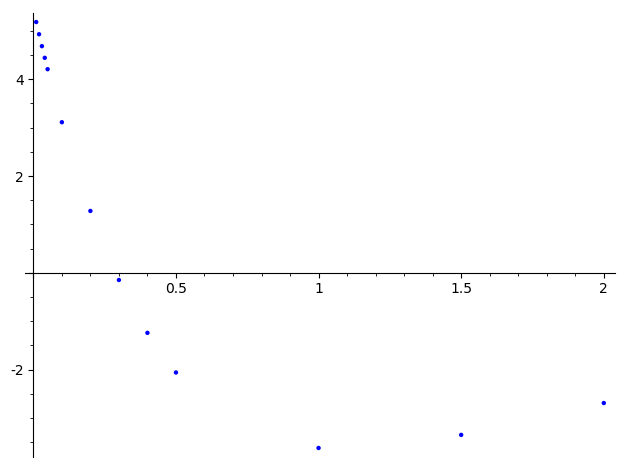

In [28]:
list_plot(plot_data_f_dz).show()

Результирующий график силы Лоренца приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра

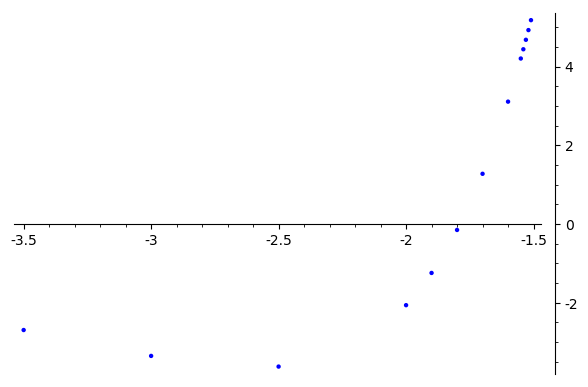

In [29]:
list_plot(plot_data_f_Za).show()

Результаты расчёта силы притяжения между тороидально намагниченными цилиндрами в зависимости от зазора позволяют сделать вывод о том, что поперечная сила Ампера-Лоренца при величине зазора меньше определённого предела работает на притяжение цилиндров, которое собственно и зафиксировано в опыте. При величине зазора больше определённого предела поперечная сила Ампера-Лоренца работает на отталкивание цилиндров.

Этот момент в опыте Дейны зафиксирован не был, ввиду того, что при планировании эксперимента вопрос о зависимости направления силы взаимодействия от зазора между цилиндрами не ставился.  

На взгляд автора для дальнейших исследований необходима следующая постановка эксперимента. Установить зазор между цилиндрами более 3 мм. И показать направление силы их взаимодействия: притягивание или отталкивание.

Таким образом в данной работе показано, что для доказательства существования продольной силы Николаева с помощью опыта Дейны (опыт Николаева 31) совершенно недостаточно установления факта притяжения цилиндров при зазоре между их торцами менее 3 мм. Для выяснения этого вопроса необходимы дальнейшие экспериментальные исследования.

Результирующий график векторного магнитного поля $H$ (компонента $\varphi$) на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

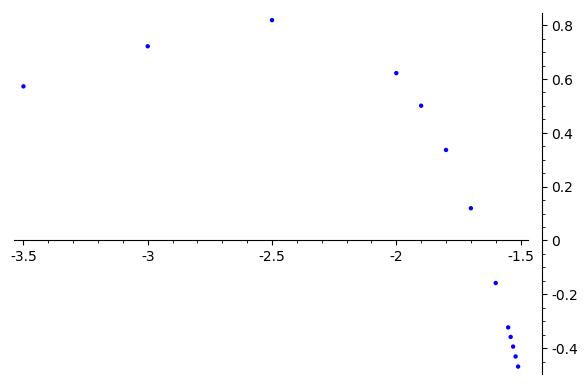

In [30]:
list_plot(plot_data_h).show()

Может показаться, что полученные в данной работе результаты о налиции угловой компоненты векторного магнитного поля за пределами материала тороидально намагниченного цилиндра противоречат теореме о циркуляции магнитного поля.

$\oint {\vec  B}\cdot {\vec  {dl}}={\frac  {4\pi }{c}}\int {\vec  j}\cdot {\vec  {ds}}$

Действительно, циркуляция магнитного поля взятая по кружности отстоящей на некотором расстоянии от торца тороидально намагниченного цилиндра отлична от нуля, в то время как молекулярные токи намагниченности не пересекают плоскость, натянутую на эту окружность.

Это кажущееся противоречие разрешается тем, что данную плоскость пересекают токи смещения продуцированные молекулярными токами намагниченности цилиндра.

Исходя из определения ротора в цилиндрических координатах и того факта что в данной конфигурации отлична от нуля только $H_{\varphi}$ компонента магнитного поля для ротора $H$ будут отличными от нуля следующие две компоненты


$rot\,H_r = -\frac{\partial}{\partial z_a}H_{\varphi}$

$rot\,H_z = \frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,H_{\varphi})$

где

$H_{\varphi}=\frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

Итак,

$rot\,H_r = -\frac{\partial}{\partial z_a}\frac{\partial}{\partial z_a}A_T+\frac{\partial}{\partial z_a}\frac{\partial}{\partial r_a}(A_S+A_V)$

$rot\,H_z = \frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,\frac{\partial}{\partial z_a}A_T)-\frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,\frac{\partial}{\partial r_a}(A_S+A_V))$

In [31]:
At2_diff_za_mult_ra_diff_ra_div_ra = lambda I0, rj, ra, zj1, zj2, za : (1/ra)*(ra*At2_diff_za (I0, rj, ra, zj1, zj2, za)).diff(ra)
print(At2_diff_za_mult_ra_diff_ra_div_ra (I0, rj, ra, zj1, zj2, za))

-2*(2*I0*rj*(za - zj1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2))/((ra - rj)^2 + (za - zj1)^2)^(3/2) - 2*I0*rj*(za - zj2)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2))/((ra - rj)^2 + (za - zj2)^2)^(3/2) - (6*I0*(ra - rj)*rj*(za - zj1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2))/((ra - rj)^2 + (za - zj1)^2)^(5/2) - 6*I0*(ra - rj)*rj*(za - zj2)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2))/((ra - rj)^2 + (za - zj2)^2)^(5/2) - ((4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)))*I0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj1)^2)^2 - rj/((ra - rj)^2 + (za - zj1)^2))*(za - zj1)/(sqrt((ra - rj)^2 + (za - zj1)^2)*ra*(4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)) - (8*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj1)^2)^2 - rj/((ra - rj)^2 + (za - zj1)^2))*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - ((ra - rj)^2 + (za - zj1)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)*el

In [32]:
As2_diff_ra_mult_ra_diff_ra_div_ra = lambda I0, rj1, rj2, ra, zj, za : (1/ra)*(ra*As2_diff_ra (I0, rj1, rj2, ra, zj, za)).diff(ra)
print (As2_diff_ra_mult_ra_diff_ra_div_ra (I0, rj1, rj2, ra, zj, za))

(4*I0*(ra - rj1)*rj1*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/((ra - rj1)^2 + (za - zj)^2)^(3/2) - 4*I0*(ra - rj2)*rj2*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/((ra - rj2)^2 + (za - zj)^2)^(3/2) - (12*I0*(ra - rj1)^2*rj1*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/((ra - rj1)^2 + (za - zj)^2)^(5/2) - 12*I0*(ra - rj2)^2*rj2*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/((ra - rj2)^2 + (za - zj)^2)^(5/2) - sqrt((ra - rj1)^2 + (za - zj)^2)*(8*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - ((ra - rj1)^2 + (za - zj)^2)*((4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))/(ra*rj1) - ((ra - rj1)^2 + (za - zj)^2)*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)

In [33]:
exec ("At_diff_za_mult_ra_diff_ra_div_ra_subs_zj = lambda rj, ra, za : " + str(At2_diff_za_mult_ra_diff_ra_div_ra (1, rj, ra, Zj1, Zj2, za)).replace("^", "**"))
# print (At_diff_za_mult_ra_diff_ra_div_ra_subs_zj (rj, ra, za))

In [34]:
exec ("As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj = lambda ra, zj, za : " + str(As2_diff_ra_mult_ra_diff_ra_div_ra (1, Rj1, Rj2, ra, zj, za)).replace("^", "**"))
# print (As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj (ra, zj, za))

In [35]:
exec ("Av_diff_ra_mult_ra_diff_ra_div_ra = lambda I0, rj, ra, zj, za : " + str((1/ra)*(ra*Av_diff_ra(I0, rj, ra, zj, za)).diff(ra)).replace("^", "**"))
print (Av_diff_ra_mult_ra_diff_ra_div_ra (I0, rj, ra, zj, za))

-((12*I0*(ra - rj)^2*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^2.5 - sqrt((ra - rj)^2 + (za - zj)^2)*(8*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - ((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*rj) - ((ra - rj)^2 + (za - zj)^2)*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))*(elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))/(ra*rj))*I0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*rj) + 8*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*r

In [36]:
AV_diff_ra_mult_ra_diff_ra_div_ra = lambda I0, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra_mult_ra_diff_ra_div_ra(I0, rj, ra, zj, za), rj1, rj2)

In [37]:
Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj = lambda ra, zj, za : AV_diff_ra_mult_ra_diff_ra_div_ra (1, Rj1, Rj2, ra, zj, za)
# print (Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(ra, zj, za))

In [38]:
def calc_rot_H_z(Za, Ra):
    At_diff_za_mult_ra_diff_ra_div_ra_subs_zj_subs_za_ra = lambda rj : At_diff_za_mult_ra_diff_ra_div_ra_subs_zj(rj, Ra, Za)
    As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj_subs_za_ra = lambda zj : As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(Ra, zj, Za)

    At_diff_za_mult_ra_diff_ra_div_ra_num_int = At_diff_za_mult_ra_diff_ra_div_ra_subs_zj_subs_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_mult_ra_diff_ra_div_ra_num_int = As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj_subs_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_mult_ra_diff_ra_div_ra_num_int = num_int( lambda zj : Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_mult_ra_diff_ra_div_ra_num_int = As_diff_ra_mult_ra_diff_ra_div_ra_num_int[0] + Av_diff_ra_mult_ra_diff_ra_div_ra_num_int

    rot_H_z = At_diff_za_mult_ra_diff_ra_div_ra_num_int[0] - As_v_diff_ra_mult_ra_diff_ra_div_ra_num_int

    print ("Ra =", Ra, "Za =", Za, "rot_H_z =", rot_H_z)

    return rot_H_z

$\oint {\vec  B}\cdot {\vec  {dl}}={\frac  {4\pi }{c}}\int {\vec  j}\cdot {\vec  {ds}}$

$\oint {\vec  B}\cdot {\vec  {dl}}=\mu  \int {\vec{ rot\,H}}\cdot {\vec  {ds}}$

$2\,\pi\,R_a\,\mu H_z = \mu  \int\limits_{0}^{2\pi}\int\limits_{0}^{R_a} r\,rot\,H_z\,{dr}\,{d\varphi}$

$2\,\pi\,R_a\,\mu H_z = 2\,\pi\,\mu  \int\limits_{0}^{R_a} r\,rot\,H_z\,{dr}$


In [39]:
dr = 0.01
dz = 0.04
Za = Zj1 - dz
circ_H_J_z = []
for Ra in(Rj1 - dr, Rj1 + dr, (Rj1 + Rj2)/2, Rj2 - dr, Rj2 + dr, 2 * Rj2, 10 * Rj2):
    (H_phi, H_phi_t, H_phi_s) = calc_H_phi( At_diff_za_subs_zj, As_diff_ra_subs_rj, Za, Ra)
    circ_H = 2 * pi * Ra * H_phi
    print ("circ_H (", Ra, ") = ", circ_H)

    J_z = 2 * pi * num_int( lambda ra : ra * calc_rot_H_z(Za, ra), 0, Ra)
    print ("J_z (", Ra, ") = ", J_z)
    
    circ_H_J_z += [((Ra, Za), (circ_H, J_z))]

Ra = 0.290000000000000 Za = -1.54000000000000 H_phi_t = 2.419092454177002
Ra = 0.290000000000000 Za = -1.54000000000000 H_phi_s = -2.605503698084907
Ra = 0.290000000000000 Za = -1.54000000000000 H_phi   = -0.1864112439079051
circ_H ( 0.290000000000000 ) =  -0.108118521466585*pi
Ra = 0.145 Za = -1.54000000000000 rot_H_z = -1.5969858479306458
Ra = 0.0037835533650101005 Za = -1.54000000000000 rot_H_z = 8.137642796027171
Ra = 0.2862164466349899 Za = -1.54000000000000 rot_H_z = -0.8108247866716596
Ra = 0.01956581183009723 Za = -1.54000000000000 rot_H_z = -1.1042591522737024
Ra = 0.2704341881699027 Za = -1.54000000000000 rot_H_z = -0.865446189283368
Ra = 0.046485612596641454 Za = -1.54000000000000 rot_H_z = -2.006022142638341
Ra = 0.2435143874033585 Za = -1.54000000000000 rot_H_z = -1.0088663353214713
Ra = 0.08215766785125915 Za = -1.54000000000000 rot_H_z = -1.9701034998938507
Ra = 0.20784233214874082 Za = -1.54000000000000 rot_H_z = -1.2172899723284587
Ra = 0.12341322084766346 Za = -1.5400

Ra = 0.01698662618955269 Za = -1.54000000000000 rot_H_z = -0.802207336927065
Ra = 0.13801337381044732 Za = -1.54000000000000 rot_H_z = -1.6404854557196398
Ra = 0.033886322063183136 Za = -1.54000000000000 rot_H_z = -1.8356670033375893
Ra = 0.12111367793681686 Za = -1.54000000000000 rot_H_z = -1.7459061422688498
Ra = 0.05468455314063683 Za = -1.54000000000000 rot_H_z = -2.036702348968246
Ra = 0.10031544685936317 Za = -1.54000000000000 rot_H_z = -1.8722545501837025
Ra = 0.23249999999999998 Za = -1.54000000000000 rot_H_z = -1.0726391313714956
Ra = 0.15702224403991916 Za = -1.54000000000000 rot_H_z = -1.522648460195847
Ra = 0.3079777559600808 Za = -1.54000000000000 rot_H_z = -0.8214083319667935
Ra = 0.16545758908160368 Za = -1.54000000000000 rot_H_z = -1.4709816703950755
Ra = 0.2995424109183963 Za = -1.54000000000000 rot_H_z = -0.8040184333016782
Ra = 0.1798457584568256 Za = -1.54000000000000 rot_H_z = -1.3838478037199522
Ra = 0.28515424154317437 Za = -1.54000000000000 rot_H_z = -0.81314863

Ra = 0.007857282222482817 Za = -1.54000000000000 rot_H_z = 2.0895544972683835
Ra = 0.2171427177775172 Za = -1.54000000000000 rot_H_z = -1.1625466758766176
Ra = 0.0246580057590281 Za = -1.54000000000000 rot_H_z = -1.4900160095509292
Ra = 0.2003419942409719 Za = -1.54000000000000 rot_H_z = -1.261609568184097
Ra = 0.049189822349781975 Za = -1.54000000000000 rot_H_z = -2.020767973207609
Ra = 0.17581017765021803 Za = -1.54000000000000 rot_H_z = -1.4081638485164643
Ra = 0.07938080294608574 Za = -1.54000000000000 rot_H_z = -1.9829153564312616
Ra = 0.14561919705391427 Za = -1.54000000000000 rot_H_z = -1.5931395525944474
Ra = 0.3375 Za = -1.54000000000000 rot_H_z = -0.9402033334908282
Ra = 0.22793551554181818 Za = -1.54000000000000 rot_H_z = -1.0992840287802732
Ra = 0.44706448445818187 Za = -1.54000000000000 rot_H_z = -1.028830660688243
Ra = 0.24018037124748925 Za = -1.54000000000000 rot_H_z = -1.0280613206940785
Ra = 0.4348196287525108 Za = -1.54000000000000 rot_H_z = -1.040024718141261
Ra = 0

Ra = 0.0016177067728864736 Za = -1.54000000000000 rot_H_z = 23.91470001516233
Ra = 0.7433822932271135 Za = -1.54000000000000 rot_H_z = -0.6240420778042548
Ra = 0.02601633446999868 Za = -1.54000000000000 rot_H_z = -1.5622501298295952
Ra = 0.7189836655300013 Za = -1.54000000000000 rot_H_z = -0.652882057973132
Ra = 0.08164539684655969 Za = -1.54000000000000 rot_H_z = -1.9725257166611923
Ra = 0.6633546031534403 Za = -1.54000000000000 rot_H_z = -0.7236790226189456
Ra = 0.16287296733594475 Za = -1.54000000000000 rot_H_z = -1.486766586637767
Ra = 0.5821270326640553 Za = -1.54000000000000 rot_H_z = -0.8389071787798184
Ra = 0.2628386586437061 Za = -1.54000000000000 rot_H_z = -0.9023740067285289
Ra = 0.4821613413562939 Za = -1.54000000000000 rot_H_z = -0.9866390258115132
Ra = 1.1175 Za = -1.54000000000000 rot_H_z = -0.31867060649782886
Ra = 0.7547198181273534 Za = -1.54000000000000 rot_H_z = -0.6110911538594932
Ra = 1.4802801818726463 Za = -1.54000000000000 rot_H_z = -0.19016596905431982
Ra = 0.

Ra = 1.1305081672349993 Za = -1.54000000000000 rot_H_z = -0.3116218884745017
Ra = 1.4769918327650007 Za = -1.54000000000000 rot_H_z = -0.19080564126030453
Ra = 1.1583226984232797 Za = -1.54000000000000 rot_H_z = -0.2971696077197761
Ra = 1.4491773015767202 Za = -1.54000000000000 rot_H_z = -0.19537260369988374
Ra = 1.1989364836679723 Za = -1.54000000000000 rot_H_z = -0.2775310085701119
Ra = 1.4085635163320276 Za = -1.54000000000000 rot_H_z = -0.20332447718288904
Ra = 1.248919329321853 Za = -1.54000000000000 rot_H_z = -0.25565756401653816
Ra = 1.358580670678147 Za = -1.54000000000000 rot_H_z = -0.21653389739643414
Ra = 0.093125 Za = -1.54000000000000 rot_H_z = -1.9132417074914971
Ra = 0.002429954531838377 Za = -1.54000000000000 rot_H_z = 14.693164638150748
Ra = 0.1838200454681616 Za = -1.54000000000000 rot_H_z = -1.3599889590872882
Ra = 0.012565973977088321 Za = -1.54000000000000 rot_H_z = 0.044662788947920085
Ra = 0.17368402602291166 Za = -1.54000000000000 rot_H_z = -1.421012529885597
Ra

Ra = 0.003278841915514863 Za = -1.54000000000000 rot_H_z = 9.946617080374043
Ra = 1.5067211580844853 Za = -1.54000000000000 rot_H_z = -0.1819421446969116
Ra = 0.05273109402644027 Za = -1.54000000000000 rot_H_z = -2.0329056042490334
Ra = 1.4572689059735597 Za = -1.54000000000000 rot_H_z = -0.19406669858980763
Ra = 0.16548261642725526 Za = -1.54000000000000 rot_H_z = -1.4708290227087604
Ra = 1.3445173835727449 Za = -1.54000000000000 rot_H_z = -0.22082915365065814
Ra = 0.3301183633252035 Za = -1.54000000000000 rot_H_z = -0.9098275350599323
Ra = 1.1798816366747964 Za = -1.54000000000000 rot_H_z = -0.28653259470314163
Ra = 0.5327333886603975 Za = -1.54000000000000 rot_H_z = -0.9133021884228967
Ra = 0.9772666113396025 Za = -1.54000000000000 rot_H_z = -0.40761634993546725
Ra = 0.3775 Za = -1.54000000000000 rot_H_z = -1.0402577042850574
Ra = 0.009850285484767685 Za = -1.54000000000000 rot_H_z = 0.9756303468077818
Ra = 0.7451497145152324 Za = -1.54000000000000 rot_H_z = -0.6220045094644338
Ra =

Ra = 0.7681827735066101 Za = -1.54000000000000 rot_H_z = -0.5960766813345924
Ra = 1.11931722649339 Za = -1.54000000000000 rot_H_z = -0.31767460265231406
Ra = 0.7963706541068138 Za = -1.54000000000000 rot_H_z = -0.5658905937765706
Ra = 1.0911293458931863 Za = -1.54000000000000 rot_H_z = -0.3335458424775748
Ra = 0.837529590831301 Za = -1.54000000000000 rot_H_z = -0.5247225054785325
Ra = 1.0499704091686992 Za = -1.54000000000000 rot_H_z = -0.35840150118918057
Ra = 0.8881833471650995 Za = -1.54000000000000 rot_H_z = -0.4784676179629761
Ra = 0.9993166528349007 Za = -1.54000000000000 rot_H_z = -0.391931786107242
Ra = 1.32125 Za = -1.54000000000000 rot_H_z = -0.22842806949256778
Ra = 1.1374251427423838 Za = -1.54000000000000 rot_H_z = -0.3079497360925423
Ra = 1.5050748572576162 Za = -1.54000000000000 rot_H_z = -0.18265290896473374
Ra = 1.1579692895374543 Za = -1.54000000000000 rot_H_z = -0.2973480394045289
Ra = 1.4845307104625458 Za = -1.54000000000000 rot_H_z = -0.18925144795203863
Ra = 1.19

Ra = 1.341935327053407 Za = -1.54000000000000 rot_H_z = -0.22164270910597983
Ra = 1.489314672946593 Za = -1.54000000000000 rot_H_z = -0.18807000566449972
Ra = 1.3625147954156505 Za = -1.54000000000000 rot_H_z = -0.21537451806996447
Ra = 1.4687352045843494 Za = -1.54000000000000 rot_H_z = -0.1922404135918967
Ra = 1.3878416735825496 Za = -1.54000000000000 rot_H_z = -0.20838232635005705
Ra = 1.4434083264174502 Za = -1.54000000000000 rot_H_z = -0.19634629471656595
Ra = 0.23593750000000002 Za = -1.54000000000000 rot_H_z = -1.0526383850740437
Ra = 0.18998128568559597 Za = -1.54000000000000 rot_H_z = -1.3231608882558046
Ra = 0.2818937143144041 Za = -1.54000000000000 rot_H_z = -0.8217034251512771
Ra = 0.19511732238436355 Za = -1.54000000000000 rot_H_z = -1.2925945921089443
Ra = 0.27675767761563647 Za = -1.54000000000000 rot_H_z = -0.8390194870279544
Ra = 0.2038778609958898 Za = -1.54000000000000 rot_H_z = -1.2406944878363966
Ra = 0.26799713900411026 Za = -1.54000000000000 rot_H_z = -0.87678767

Ra = 1.5523818814832189 Za = -1.54000000000000 rot_H_z = -0.15774927229912095
Ra = 2.947618118516781 Za = -1.54000000000000 rot_H_z = 0.022690348009902547
Ra = 1.6643867050601873 Za = -1.54000000000000 rot_H_z = -0.1109122219286145
Ra = 2.8356132949398125 Za = -1.54000000000000 rot_H_z = 0.02047804158739674
Ra = 1.8279321489985465 Za = -1.54000000000000 rot_H_z = -0.06747783357378367
Ra = 2.6720678510014535 Za = -1.54000000000000 rot_H_z = 0.0158015215536325
Ra = 2.029205352973905 Za = -1.54000000000000 rot_H_z = -0.03288618695061707
Ra = 2.470794647026095 Za = -1.54000000000000 rot_H_z = 0.006908090370994588
Ra = 0.375 Za = -1.54000000000000 rot_H_z = -1.037169426481082
Ra = 0.009785051806060596 Za = -1.54000000000000 rot_H_z = 1.0046762355177807
Ra = 0.7402149481939394 Za = -1.54000000000000 rot_H_z = -0.6277108575213823
Ra = 0.05060123749163081 Za = -1.54000000000000 rot_H_z = -2.0264918580055875
Ra = 0.6993987625083692 Za = -1.54000000000000 rot_H_z = -0.6770044394214665
Ra = 0.120

Ra = 0.041096676265046816 Za = -1.54000000000000 rot_H_z = -1.9580013596181418
Ra = 0.3339033237349532 Za = -1.54000000000000 rot_H_z = -0.9257340507047545
Ra = 0.08198303724963663 Za = -1.54000000000000 rot_H_z = -1.9709320657441838
Ra = 0.2930169627503634 Za = -1.54000000000000 rot_H_z = -0.8019664165752474
Ra = 0.13230133824347623 Za = -1.54000000000000 rot_H_z = -1.676140612822326
Ra = 0.24269866175652377 Za = -1.54000000000000 rot_H_z = -1.0135511496392802
Ra = 0.5625 Za = -1.54000000000000 rot_H_z = -0.8683323896972386
Ra = 0.3798925259030303 Za = -1.54000000000000 rot_H_z = -1.0428836535415869
Ra = 0.7451074740969696 Za = -1.54000000000000 rot_H_z = -0.6220531256826272
Ra = 0.4003006187458154 Za = -1.54000000000000 rot_H_z = -1.0539527067973573
Ra = 0.7246993812541846 Za = -1.54000000000000 rot_H_z = -0.6460060431925392
Ra = 0.4351107059439329 Za = -1.54000000000000 rot_H_z = -1.0397878705608221
Ra = 0.689889294056067 Za = -1.54000000000000 rot_H_z = -0.689032014099217
Ra = 0.48

Ra = 1.9569830372496366 Za = -1.54000000000000 rot_H_z = -0.04360066427379067
Ra = 2.1680169627503636 Za = -1.54000000000000 rot_H_z = -0.01631012801983317
Ra = 2.0073013382434763 Za = -1.54000000000000 rot_H_z = -0.03596524205954568
Ra = 2.1176986617565237 Za = -1.54000000000000 rot_H_z = -0.0217793549686269
Ra = 0.09375 Za = -1.54000000000000 rot_H_z = -1.909770886103951
Ra = 0.002446262951515149 Za = -1.54000000000000 rot_H_z = 14.570832677285312
Ra = 0.18505373704848485 Za = -1.54000000000000 rot_H_z = -1.3525996611637545
Ra = 0.012650309372907703 Za = -1.54000000000000 rot_H_z = 0.022477032653022366
Ra = 0.1748496906270923 Za = -1.54000000000000 rot_H_z = -1.4139649460528547
Ra = 0.03005535297196646 Za = -1.54000000000000 rot_H_z = -1.727789933368098
Ra = 0.15744464702803354 Za = -1.54000000000000 rot_H_z = -1.520051043654294
Ra = 0.053119181800383074 Za = -1.54000000000000 rot_H_z = -2.033810169023732
Ra = 0.13438081819961692 Za = -1.54000000000000 rot_H_z = -1.6631552414872264
R

Ra = 1.5661506691217382 Za = -1.54000000000000 rot_H_z = -0.1506785633576655
Ra = 1.6213493308782618 Za = -1.54000000000000 rot_H_z = -0.1264024047320822
Ra = 1.78125 Za = -1.54000000000000 rot_H_z = -0.07802389299589896
Ra = 1.6899462629515152 Za = -1.54000000000000 rot_H_z = -0.10273454315207742
Ra = 1.8725537370484848 Za = -1.54000000000000 rot_H_z = -0.05843010743260929
Ra = 1.7001503093729078 Za = -1.54000000000000 rot_H_z = -0.09964720826708584
Ra = 1.8623496906270922 Za = -1.54000000000000 rot_H_z = -0.06041808640945023
Ra = 1.7175553529719665 Za = -1.54000000000000 rot_H_z = -0.09459125933305201
Ra = 1.8449446470280335 Za = -1.54000000000000 rot_H_z = -0.06391781625334492
Ra = 1.740619181800383 Za = -1.54000000000000 rot_H_z = -0.08826411515028476
Ra = 1.821880818199617 Za = -1.54000000000000 rot_H_z = -0.06877885391531757
Ra = 1.7672930307204722 Za = -1.54000000000000 rot_H_z = -0.08142074010599731
Ra = 1.7952069692795278 Za = -1.54000000000000 rot_H_z = -0.07474403074829283
R

Ra = 1.6396607449927325 Za = -1.54000000000000 rot_H_z = -0.11951436287049244
Ra = 5.8603392550072675 Za = -1.54000000000000 rot_H_z = 0.01225502874816354
Ra = 2.646026764869524 Za = -1.54000000000000 rot_H_z = 0.014867872442376782
Ra = 4.853973235130476 Za = -1.54000000000000 rot_H_z = 0.018357390872620095
Ra = 11.25 Za = -1.54000000000000 rot_H_z = 0.0017164574689739892
Ra = 7.597850518060606 Za = -1.54000000000000 rot_H_z = 0.006075162819681859
Ra = 14.902149481939393 Za = -1.54000000000000 rot_H_z = 0.0006339625919440443
Ra = 8.006012374916308 Za = -1.54000000000000 rot_H_z = 0.005193800314639974
Ra = 14.493987625083692 Za = -1.54000000000000 rot_H_z = 0.0007011386390606391
Ra = 8.702214118878658 Za = -1.54000000000000 rot_H_z = 0.004011519691785135
Ra = 13.797785881121342 Za = -1.54000000000000 rot_H_z = 0.0008372403307661826
Ra = 9.624767272015323 Za = -1.54000000000000 rot_H_z = 0.00290009999449528
Ra = 12.875232727984677 Za = -1.54000000000000 rot_H_z = 0.0010715904262879395
Ra

Ra = 2.5365066912173813 Za = -1.54000000000000 rot_H_z = 0.010263582889556942
Ra = 3.0884933087826187 Za = -1.54000000000000 rot_H_z = 0.02458224891292211
Ra = 0.46875 Za = -1.54000000000000 rot_H_z = -1.0041140672825737
Ra = 0.012231314757575773 Za = -1.54000000000000 rot_H_z = 0.13591443141595905
Ra = 0.9252686852424242 Za = -1.54000000000000 rot_H_z = -0.44744080934139774
Ra = 0.06325154686453849 Za = -1.54000000000000 rot_H_z = -2.0351319453734544
Ra = 0.8742484531354615 Za = -1.54000000000000 rot_H_z = -0.49073091962228954
Ra = 0.15027676485983232 Za = -1.54000000000000 rot_H_z = -1.5642650618744947
Ra = 0.7872232351401677 Za = -1.54000000000000 rot_H_z = -0.5755039855973569
Ra = 0.2655959090019154 Za = -1.54000000000000 rot_H_z = -0.8884590157241732
Ra = 0.6719040909980847 Za = -1.54000000000000 rot_H_z = -0.7123420938936071
Ra = 0.3989651536023604 Za = -1.54000000000000 rot_H_z = -1.0537714693679625
Ra = 0.5385348463976396 Za = -1.54000000000000 rot_H_z = -0.9045499010558995
Ra 

Ra = 0.703125 Za = -1.54000000000000 rot_H_z = -0.6723476945437366
Ra = 0.4748656573787879 Za = -1.54000000000000 rot_H_z = -0.9963096165278547
Ra = 0.9313843426212121 Za = -1.54000000000000 rot_H_z = -0.44254055706429263
Ra = 0.5003757734322692 Za = -1.54000000000000 rot_H_z = -0.9611849711114466
Ra = 0.9058742265677308 Za = -1.54000000000000 rot_H_z = -0.4633810888941863
Ra = 0.5438883824299161 Za = -1.54000000000000 rot_H_z = -0.8964584203399895
Ra = 0.8623616175700839 Za = -1.54000000000000 rot_H_z = -0.5014641462666019
Ra = 0.6015479545009577 Za = -1.54000000000000 rot_H_z = -0.8102573678638407
Ra = 0.8047020454990423 Za = -1.54000000000000 rot_H_z = -0.5572843975479467
Ra = 0.6682325768011802 Za = -1.54000000000000 rot_H_z = -0.7171905659549438
Ra = 0.7380174231988198 Za = -1.54000000000000 rot_H_z = -0.6302693723807682
Ra = 0.4697678524158262 Za = -1.54000000000000 rot_H_z = -1.0028362556361756
Ra = 0.9364821475841738 Za = -1.54000000000000 rot_H_z = -0.4385011648972652
Ra = 0.4

Ra = 0.350033585655303 Za = -1.54000000000000 rot_H_z = -0.9839469015529865
Ra = 0.2422814433580673 Za = -1.54000000000000 rot_H_z = -1.0159503652693616
Ra = 0.34365605664193266 Za = -1.54000000000000 rot_H_z = -0.9630925648942608
Ra = 0.253159595607479 Za = -1.54000000000000 rot_H_z = -0.9543160316889612
Ra = 0.332777904392521 Za = -1.54000000000000 rot_H_z = -0.9210678307289939
Ra = 0.2675744886252394 Za = -1.54000000000000 rot_H_z = -0.8788084695649587
Ra = 0.3183630113747606 Za = -1.54000000000000 rot_H_z = -0.8591811137072511
Ra = 0.284245644200295 Za = -1.54000000000000 rot_H_z = -0.8153220679015547
Ra = 0.301691855799705 Za = -1.54000000000000 rot_H_z = -0.8069671259865459
Ra = 0.23462946310395655 Za = -1.54000000000000 rot_H_z = -1.0602411492069734
Ra = 0.35130803689604345 Za = -1.54000000000000 rot_H_z = -0.9877485003923745
Ra = 0.23846733449087648 Za = -1.54000000000000 rot_H_z = -1.0379669269343452
Ra = 0.3474701655091235 Za = -1.54000000000000 rot_H_z = -0.9759292440995395


In [40]:
print ("circ_H_J_z = ", circ_H_J_z)

circ_H_J_z =  [((0.290000000000000, -1.54000000000000), (-0.108118521466585*pi, -0.10811852146666323*pi)), ((0.310000000000000, -1.54000000000000), (-0.117821565803311*pi, -0.11782156580235059*pi)), ((0.900000000000000, -1.54000000000000), (-0.645400681610558*pi, -0.6454006816107795*pi)), ((1.49000000000000, -1.54000000000000), (-1.04545372632752*pi, -1.0454537263294106*pi)), ((1.51000000000000, -1.54000000000000), (-1.05652346264694*pi, -1.0565234626489075*pi)), ((3.00000000000000, -1.54000000000000), (-1.18241457183107*pi, -1.1824145718314787*pi)), ((15.0000000000000, -1.54000000000000), (-0.154959026647993*pi, -0.15495902664807285*pi))]


Ra = 0.900000000000000 Za = -1.51000000000000 rot_H_z = -0.4151014901957355
Ra = 0.900000000000000 Za = -1.52000000000000 rot_H_z = -0.4336915558412153
Ra = 0.900000000000000 Za = -1.53000000000000 rot_H_z = -0.45143206514659084
Ra = 0.900000000000000 Za = -1.54000000000000 rot_H_z = -0.4683317466204402
Ra = 0.900000000000000 Za = -1.55000000000000 rot_H_z = -0.48440015346931276
Ra = 0.900000000000000 Za = -1.60000000000000 rot_H_z = -0.5526590663393751
Ra = 0.900000000000000 Za = -1.70000000000000 rot_H_z = -0.6341208035893473
Ra = 0.900000000000000 Za = -1.80000000000000 rot_H_z = -0.654996426421047
Ra = 0.900000000000000 Za = -1.90000000000000 rot_H_z = -0.6310439202611855
Ra = 0.900000000000000 Za = -2.00000000000000 rot_H_z = -0.5764451521621456
Ra = 0.900000000000000 Za = -2.50000000000000 rot_H_z = -0.1696596724731403
Ra = 0.900000000000000 Za = -3.00000000000000 rot_H_z = 0.11176658009228102
Ra = 0.900000000000000 Za = -3.50000000000000 rot_H_z = 0.22381330878526862


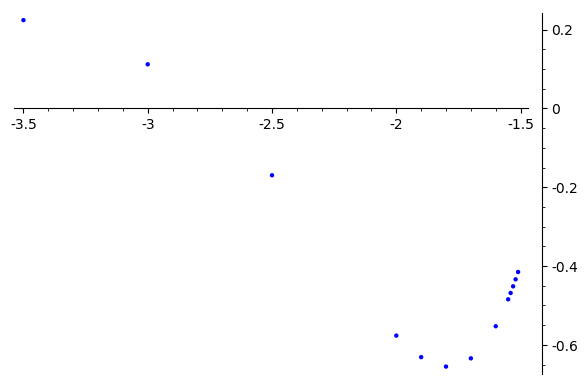

In [41]:
plot_data_rot_H_z = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]

list_plot(plot_data_rot_H_z)

Ra = 0.150000000000000 Za = -1.51000000000000 rot_H_z = -3.383218146572797
Ra = 0.150000000000000 Za = -1.52000000000000 rot_H_z = -2.7703546545603333
Ra = 0.150000000000000 Za = -1.53000000000000 rot_H_z = -2.1637126203623613
Ra = 0.150000000000000 Za = -1.54000000000000 rot_H_z = -1.565977868197475
Ra = 0.150000000000000 Za = -1.55000000000000 rot_H_z = -0.9794667771357188
Ra = 0.150000000000000 Za = -1.60000000000000 rot_H_z = 1.7333074424077175
Ra = 0.150000000000000 Za = -1.70000000000000 rot_H_z = 5.965703224520091
Ra = 0.150000000000000 Za = -1.80000000000000 rot_H_z = 8.86702271527603
Ra = 0.150000000000000 Za = -1.90000000000000 rot_H_z = 10.720209028404684
Ra = 0.150000000000000 Za = -2.00000000000000 rot_H_z = 11.752998376278633
Ra = 0.150000000000000 Za = -2.50000000000000 rot_H_z = 10.916119381871766
Ra = 0.150000000000000 Za = -3.00000000000000 rot_H_z = 7.8934723971408225
Ra = 0.150000000000000 Za = -3.50000000000000 rot_H_z = 5.512706209909056


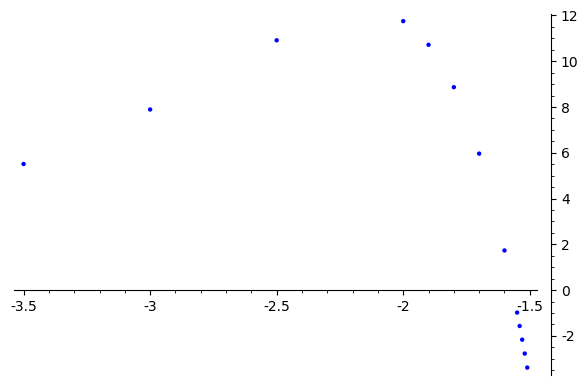

In [42]:
plot_data_rot_H_z = []

Ra = (Rj1) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]

list_plot(plot_data_rot_H_z)

Ra = 0.0300000000000000 Za = -1.51000000000000 rot_H_z = -16.049420478430136
Ra = 0.0300000000000000 Za = -1.52000000000000 rot_H_z = -11.23601154109833
Ra = 0.0300000000000000 Za = -1.53000000000000 rot_H_z = -6.456252792955619
Ra = 0.0300000000000000 Za = -1.54000000000000 rot_H_z = -1.7259286641697464
Ra = 0.0300000000000000 Za = -1.55000000000000 rot_H_z = 2.9398614936641536
Ra = 0.0300000000000000 Za = -1.60000000000000 rot_H_z = 24.841975763668113
Ra = 0.0300000000000000 Za = -1.70000000000000 rot_H_z = 58.40797994357918
Ra = 0.0300000000000000 Za = -1.80000000000000 rot_H_z = 77.67386341829125
Ra = 0.0300000000000000 Za = -1.90000000000000 rot_H_z = 86.36745900883872
Ra = 0.0300000000000000 Za = -2.00000000000000 rot_H_z = 88.52652386877224
Ra = 0.0300000000000000 Za = -2.50000000000000 rot_H_z = 68.26508300369596
Ra = 0.0300000000000000 Za = -3.00000000000000 rot_H_z = 45.562959272480015
Ra = 0.0300000000000000 Za = -3.50000000000000 rot_H_z = 30.459340256531597


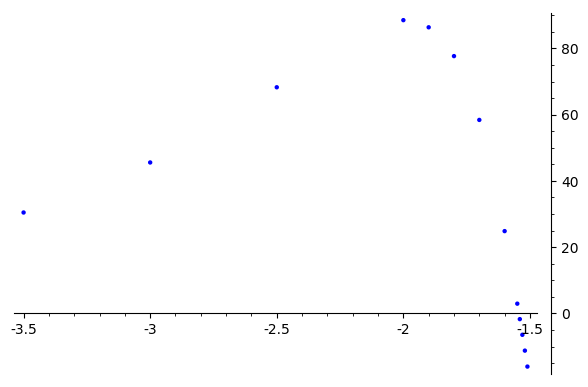

In [43]:
plot_data_rot_H_z = []

Ra = (Rj1) / 10
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]
    
list_plot(plot_data_rot_H_z)

Ra = 0.00300000000000000 Za = -1.51000000000000 rot_H_z = -154.53426705579332
Ra = 0.00300000000000000 Za = -1.52000000000000 rot_H_z = -98.76800967310403
Ra = 0.00300000000000000 Za = -1.53000000000000 rot_H_z = -43.45020193885336
Ra = 0.00300000000000000 Za = -1.54000000000000 rot_H_z = 11.208471901918344
Ra = 0.00300000000000000 Za = -1.55000000000000 rot_H_z = 65.00763743675495
Ra = 0.00300000000000000 Za = -1.60000000000000 rot_H_z = 315.13763505355587
Ra = 0.00300000000000000 Za = -1.70000000000000 rot_H_z = 683.8669519851097
Ra = 0.00300000000000000 Za = -1.80000000000000 rot_H_z = 878.9605763194085
Ra = 0.00300000000000000 Za = -1.90000000000000 rot_H_z = 955.1668488254779
Ra = 0.00300000000000000 Za = -2.00000000000000 rot_H_z = 963.0470036127904
Ra = 0.00300000000000000 Za = -2.50000000000000 rot_H_z = 713.4146307173538
Ra = 0.00300000000000000 Za = -3.00000000000000 rot_H_z = 468.51559918705453
Ra = 0.00300000000000000 Za = -3.50000000000000 rot_H_z = 310.49832113299453


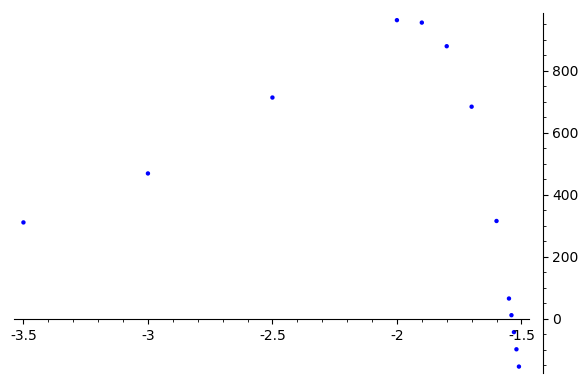

In [46]:
plot_data_rot_H_z = []

Ra = (Rj1) / 100
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]
    
list_plot(plot_data_rot_H_z)

Ra = 3.00000000000000 Za = -1.51000000000000 rot_H_z = 0.02738344536164429
Ra = 3.00000000000000 Za = -1.52000000000000 rot_H_z = 0.026086804877613542
Ra = 3.00000000000000 Za = -1.53000000000000 rot_H_z = 0.024791735534310598
Ra = 3.00000000000000 Za = -1.54000000000000 rot_H_z = 0.02349846128535922
Ra = 3.00000000000000 Za = -1.55000000000000 rot_H_z = 0.02220720544868245
Ra = 3.00000000000000 Za = -1.60000000000000 rot_H_z = 0.015788959707442513
Ra = 3.00000000000000 Za = -1.70000000000000 rot_H_z = 0.0032291792039607706
Ra = 3.00000000000000 Za = -1.80000000000000 rot_H_z = -0.008791140209263415
Ra = 3.00000000000000 Za = -1.90000000000000 rot_H_z = -0.020089001828130906
Ra = 3.00000000000000 Za = -2.00000000000000 rot_H_z = -0.030512638863027047
Ra = 3.00000000000000 Za = -2.50000000000000 rot_H_z = -0.06672708060313437
Ra = 3.00000000000000 Za = -3.00000000000000 rot_H_z = -0.07737557017263377
Ra = 3.00000000000000 Za = -3.50000000000000 rot_H_z = -0.07127200636434289


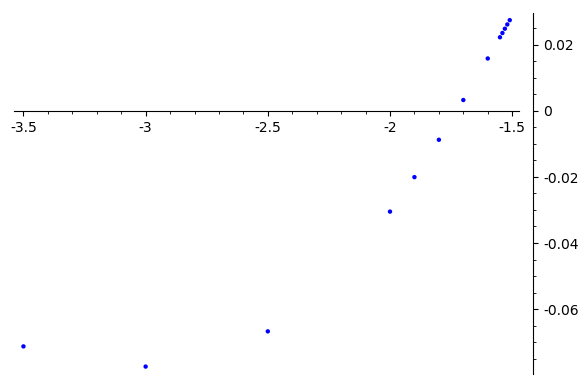

In [45]:
plot_data_rot_H_z = []

Ra = (Rj2) * 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]

list_plot(plot_data_rot_H_z)

In [47]:
At2_diff_za_diff_za = lambda I0, rj, ra, zj1, zj2, za : At2_diff_za (I0, rj, ra, zj1, zj2, za).diff(za)

In [48]:
As2_diff_ra_diff_za = lambda I0, rj1, rj2, ra, zj, za : As2_diff_ra (I0, rj1, rj2, ra, zj, za).diff(za)

In [49]:
exec ("At_diff_za_diff_za_subs_zj = lambda rj, ra, za : " + str(At2_diff_za_diff_za (1, rj, ra, Zj1, Zj2, za)).replace("^", "**"))

In [50]:
exec ("As_diff_ra_diff_za_subs_rj = lambda ra, zj, za : " + str(As2_diff_ra_diff_za (1, Rj1, Rj2, ra, zj, za)).replace("^", "**"))

In [51]:
exec ("Av_diff_ra_diff_za = lambda I0, rj, ra, zj, za : " + str(Av_diff_ra(I0, rj, ra, zj, za).diff(za)).replace("^", "**"))

In [52]:
AV_diff_ra_diff_za = lambda I0, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra_diff_za(I0, rj, ra, zj, za), rj1, rj2)

In [53]:
Av_diff_ra_diff_za_subs_rj = lambda ra, zj, za : AV_diff_ra_diff_za (1, Rj1, Rj2, ra, zj, za)

In [54]:
def calc_rot_H_r(Za, Ra):
    At_diff_za_subs_zj_diff_za_subs_za_ra = lambda rj : At_diff_za_diff_za_subs_zj(rj, Ra, Za)
    As_diff_ra_subs_rj_diff_za_subs_za_ra = lambda zj : As_diff_ra_diff_za_subs_rj(Ra, zj, Za)

    At_diff_za_diff_za_num_int = At_diff_za_subs_zj_diff_za_subs_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_diff_za_num_int = As_diff_ra_subs_rj_diff_za_subs_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_diff_za_num_int = num_int( lambda zj : Av_diff_ra_diff_za_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_diff_za_num_int = As_diff_ra_diff_za_num_int[0] + Av_diff_ra_diff_za_num_int

    rot_H_r = - At_diff_za_diff_za_num_int[0] + As_v_diff_ra_diff_za_num_int

    print ("Ra =", Ra, "Za =", Za, "rot_H_r =", rot_H_r)

    return rot_H_r

Ra = 0.900000000000000 Za = -1.51000000000000 rot_H_r = 3.792004635515948
Ra = 0.900000000000000 Za = -1.52000000000000 rot_H_r = 3.7142241628163113
Ra = 0.900000000000000 Za = -1.53000000000000 rot_H_r = 3.6371699092424397
Ra = 0.900000000000000 Za = -1.54000000000000 rot_H_r = 3.5608671380679793
Ra = 0.900000000000000 Za = -1.55000000000000 rot_H_r = 3.485339658077046
Ra = 0.900000000000000 Za = -1.60000000000000 rot_H_r = 3.1200605705772926
Ra = 0.900000000000000 Za = -1.70000000000000 rot_H_r = 2.457107341129122
Ra = 0.900000000000000 Za = -1.80000000000000 rot_H_r = 1.8892243575893701
Ra = 0.900000000000000 Za = -1.90000000000000 rot_H_r = 1.4136650557245103
Ra = 0.900000000000000 Za = -2.00000000000000 rot_H_r = 1.0221248799285627
Ra = 0.900000000000000 Za = -2.50000000000000 rot_H_r = -0.029133701913133248
Ra = 0.900000000000000 Za = -3.00000000000000 rot_H_r = -0.28671679115847326
Ra = 0.900000000000000 Za = -3.50000000000000 rot_H_r = -0.2895888430304817


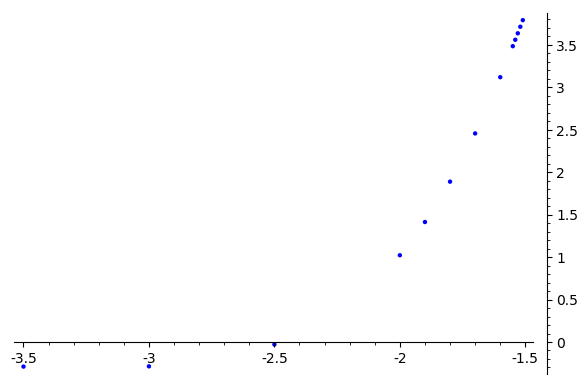

In [55]:
plot_data_rot_H_r = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_r = calc_rot_H_r(Za, Ra)
    plot_data_rot_H_r += [(Za, j_r)]

list_plot(plot_data_rot_H_r).show()

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

za_linspace = np.linspace(-3, -1.6, 10)
ra_linspace = np.linspace(0.1, 3,   10)

za_list = za_linspace.tolist()
ra_list = ra_linspace.tolist()

za,ra = np.meshgrid(za_linspace, ra_linspace)

u = za * np.nan
v = ra * np.nan

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Za = za_list[iz]
        Ra = ra_list[ir]
        u[ir][iz] = calc_rot_H_z(Za, Ra)
        v[ir][iz] = calc_rot_H_r(Za, Ra)


Ra = 0.1 Za = -3.0 rot_H_z = 12.620476477634611
Ra = 0.1 Za = -3.0 rot_H_r = -1.0780942994611025
Ra = 0.42222222222222217 Za = -3.0 rot_H_z = 1.766040981812357
Ra = 0.42222222222222217 Za = -3.0 rot_H_r = -0.708395293095295
Ra = 0.7444444444444444 Za = -3.0 rot_H_z = 0.377934571726084
Ra = 0.7444444444444444 Za = -3.0 rot_H_r = -0.4035660538392909
Ra = 1.0666666666666667 Za = -3.0 rot_H_z = -0.0534376129746057
Ra = 1.0666666666666667 Za = -3.0 rot_H_r = -0.1831248968878464
Ra = 1.3888888888888888 Za = -3.0 rot_H_z = -0.18695580384684607
Ra = 1.3888888888888888 Za = -3.0 rot_H_r = -0.03939131093903381
Ra = 1.711111111111111 Za = -3.0 rot_H_z = -0.20445933895390456
Ra = 1.711111111111111 Za = -3.0 rot_H_r = 0.04427006541566936
Ra = 2.033333333333333 Za = -3.0 rot_H_z = -0.1784728626424491
Ra = 2.033333333333333 Za = -3.0 rot_H_r = 0.08543060657826176
Ra = 2.3555555555555556 Za = -3.0 rot_H_z = -0.1412387996196613
Ra = 2.3555555555555556 Za = -3.0 rot_H_r = 0.0996150139463331
Ra = 2.67777

Ra = 2.033333333333333 Za = -2.2222222222222223 rot_H_r = 0.3462744101102179
Ra = 2.3555555555555556 Za = -2.2222222222222223 rot_H_z = -0.14009704690469227
Ra = 2.3555555555555556 Za = -2.2222222222222223 rot_H_r = 0.273981218719307
Ra = 2.6777777777777776 Za = -2.2222222222222223 rot_H_z = -0.08488665985413191
Ra = 2.6777777777777776 Za = -2.2222222222222223 rot_H_r = 0.21280888900816075
Ra = 3.0 Za = -2.2222222222222223 rot_H_z = -0.050019269422369034
Ra = 3.0 Za = -2.2222222222222223 rot_H_r = 0.16472024724601142
Ra = 0.1 Za = -2.0666666666666664 rot_H_z = 21.345677619426787
Ra = 0.1 Za = -2.0666666666666664 rot_H_r = -0.4050583541750612
Ra = 0.42222222222222217 Za = -2.0666666666666664 rot_H_z = 1.2453763312433086
Ra = 0.42222222222222217 Za = -2.0666666666666664 rot_H_r = 0.5730683213551901
Ra = 0.7444444444444444 Za = -2.0666666666666664 rot_H_z = -0.3691313527924125
Ra = 0.7444444444444444 Za = -2.0666666666666664 rot_H_r = 0.80224031374143
Ra = 1.0666666666666667 Za = -2.06666

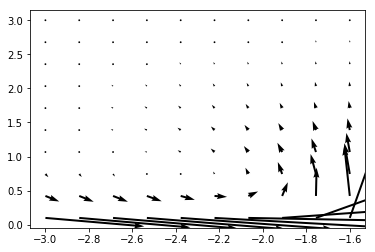

In [57]:
plt.quiver(za,ra,u,v)
plt.show()

In [60]:
for v in circ_H_J_z:
    print (v)

((0.290000000000000, -1.54000000000000), (-0.108118521466585*pi, -0.10811852146666323*pi))
((0.310000000000000, -1.54000000000000), (-0.117821565803311*pi, -0.11782156580235059*pi))
((0.900000000000000, -1.54000000000000), (-0.645400681610558*pi, -0.6454006816107795*pi))
((1.49000000000000, -1.54000000000000), (-1.04545372632752*pi, -1.0454537263294106*pi))
((1.51000000000000, -1.54000000000000), (-1.05652346264694*pi, -1.0565234626489075*pi))
((3.00000000000000, -1.54000000000000), (-1.18241457183107*pi, -1.1824145718314787*pi))
((15.0000000000000, -1.54000000000000), (-0.154959026647993*pi, -0.15495902664807285*pi))
